In [1]:
import torch.nn as nn
import torch as T
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from random import randint, random
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from src.optimizers.simulated_annealing import SimulatedAnnealing
from src.pecan_dataport.participant_preprocessing import PecanParticipantPreProcessing

<center>Simulated annealing loss function</center>
$$ Energy Ensemble_{loss} = \frac{\sum_{i=0}^{i}(w_i*s_i)}{\sum_{j=0}^{j}(w_j)} $$

In [28]:
values = {
    'lstm': np.arange(1, 5),
    'tst': np.arange(1, 5),
    'rnn': np.arange(1, 5),
    'convrnn': np.arange(1, 5)
}
values.values()

dict_values([array([1, 2, 3, 4]), array([1, 2, 3, 4]), array([1, 2, 3, 4]), array([1, 2, 3, 4])])

In [38]:
np.arange(1,401)[-200:-1]

array([201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213,
       214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226,
       227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239,
       240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252,
       253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265,
       266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278,
       279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291,
       292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304,
       305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317,
       318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330,
       331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343,
       344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356,
       357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369,
       370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 38

In [24]:
total = []
lstm = np.arange(1, 5) 
total.append(lstm)
gru = np.arange(1, 5) 
total.append(gru)
rnn = np.arange(1, 5) 
total.append(rnn)
print(lstm)
print(gru)
print(rnn)
print(np.array(total))

np.average(np.array(total), axis=0, weights=[0.4, 0.1, 0.5])


[1 2 3 4]
[1 2 3 4]
[1 2 3 4]
[[1 2 3 4]
 [1 2 3 4]
 [1 2 3 4]]


array([1., 2., 3., 4.])

In [7]:
np.arange(1, 11) * np.arange(10, 0, -1), sum(np.arange(1, 11) * np.arange(10, 0, -1))

(array([10, 18, 24, 28, 30, 30, 28, 24, 18, 10]), 220)

In [5]:
sum(np.arange(10, 0, -1))

55

In [2]:
np.average(np.arange(1, 11), weights=np.arange(10, 0, -1))

4.0

# Classes and methods creation

In [2]:
def MSEError(labels, predictions):
    return np.sum(np.diff([labels, predictions], axis=0)**2)/len(predictions)

def RMSEError(labels, predictions):
    return (MSEError(labels, predictions))**0.5

def MAEError(labels, predictions):
    return np.sum(abs(np.diff([labels, predictions], axis=0)))/len(predictions)

def MAPEError(labels, predictions):
    return np.sum(abs(np.divide(np.diff([labels, predictions], axis=0), labels)))/len(predictions)

def descale(descaler, values):
    values_2d = np.array(values)[:, np.newaxis]
    return descaler.inverse_transform(values_2d).flatten()

def PolarPlotMaker(labels: list, values: list, polar_color:str, polar_legend: str):
    num_vars = len(labels)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    ax.plot(angles, values, color=polar_color, linewidth=1)
    # Fill it in.
    ax.fill(angles, values, color=polar_color, alpha=0.25)

    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    ax.set_thetagrids(np.degrees(angles), labels)

    for label, angle in zip(ax.get_xticklabels(), angles):
        if angle in (0, np.pi):
            label.set_horizontalalignment('center')
        elif 0 < angle < np.pi:
            label.set_horizontalalignment('left')
        else:
            label.set_horizontalalignment('right')

    ax.set_rlabel_position(180 / num_vars)
    ax.set_title(polar_legend, y=1.08)
    plt.show()

In [3]:
pecan_dataset = PecanParticipantPreProcessing('661_test_30_pca', 'data/participants_data/1min/', 60)
default_scaler = pecan_dataset.get_scaler()

[!] - Trainable dataframe shape - (129086, 18)
[*] Train dataframe shape: (90360, 18)
[*] Validation dataframe shape: (25817, 18)
[*] Test dataframe shape: (12909, 18)


100%|█████████████████████████████████████████████████████████████████████████| 25757/25757 [00:01<00:00, 13368.41it/s]

[!] Train sequence shape: (60, 18)
[!] Val sequence shape: (60, 18)


# Validation step
Weigth creation using validation set

In [4]:
with open(f'etc/results/validation/661_test_30_pca/result_report.json') as json_file:
    validation_data = json.load(json_file)
    json_file.close()

In [5]:
validation_predictions_data = validation_data
val_prediction_data = []
for model in validation_data:
    for prediction in model['validate']:
        prediction['model'] = model['model']
    val_prediction_data += model['validate']
validation_prediction_df = pd.DataFrame(val_prediction_data)


In [6]:
models_predictions = []
labels = np.array(validation_prediction_df[validation_prediction_df['model'] == 'GRU'].label)
models = validation_prediction_df['model'].unique()
for model in models:
    models_predictions.append(validation_prediction_df[validation_prediction_df['model'] == model].model_output)


In [7]:
models

array(['RNN', 'LSTM', 'GRU', 'TST', 'Transformer', 'TCN', 'MLP'],
      dtype=object)

In [8]:
initial_weights = [1/len(models_predictions) for i in range(len(models_predictions) - 1)] # tirando o peso do último modelo
initial_weights.append(1 - sum(initial_weights)) # peso do último será 1 - a soma do restante
initial_weights

[0.14285714285714285,
 0.14285714285714285,
 0.14285714285714285,
 0.14285714285714285,
 0.14285714285714285,
 0.14285714285714285,
 0.14285714285714302]

In [9]:
# utilização do SA com o algoritmo para substituição por ponderação dos pesos
sa = SimulatedAnnealing(guide_func=MSEError, label=labels, 
                        models_prediction=np.array(models_predictions), 
                        x0=initial_weights, model_names=models)



Step: [2/10000] | Temp: 999.9 | Weights Sum: 1.0
Step: [3/10000] | Temp: 999.8000000000001 | Weights Sum: 1.0
Step: [4/10000] | Temp: 999.7 | Weights Sum: 1.0
Step: [5/10000] | Temp: 999.6 | Weights Sum: 1.0
Step: [6/10000] | Temp: 999.5 | Weights Sum: 1.0
Step: [7/10000] | Temp: 999.4 | Weights Sum: 1.0
Step: [8/10000] | Temp: 999.3 | Weights Sum: 1.0
Step: [9/10000] | Temp: 999.1999999999999 | Weights Sum: 1.0
Step: [10/10000] | Temp: 999.1 | Weights Sum: 1.0
Step: [11/10000] | Temp: 999.0 | Weights Sum: 1.0
Step: [12/10000] | Temp: 998.9 | Weights Sum: 1.0
Step: [13/10000] | Temp: 998.8000000000001 | Weights Sum: 1.0
Step: [14/10000] | Temp: 998.7 | Weights Sum: 1.0
Step: [15/10000] | Temp: 998.6 | Weights Sum: 1.0
Step: [16/10000] | Temp: 998.5 | Weights Sum: 1.0
Step: [17/10000] | Temp: 998.4 | Weights Sum: 1.0
Step: [18/10000] | Temp: 998.3 | Weights Sum: 1.0
Step: [19/10000] | Temp: 998.1999999999999 | Weights Sum: 1.0
Step: [20/10000] | Temp: 998.1 | Weights Sum: 1.0
Step: [21/

Step: [307/10000] | Temp: 969.4000000000001 | Weights Sum: 1.0
Step: [308/10000] | Temp: 969.3000000000001 | Weights Sum: 1.0
Step: [309/10000] | Temp: 969.1999999999999 | Weights Sum: 1.0
Step: [310/10000] | Temp: 969.0999999999999 | Weights Sum: 1.0
Step: [311/10000] | Temp: 969.0 | Weights Sum: 1.0
Step: [312/10000] | Temp: 968.9 | Weights Sum: 1.0
Step: [313/10000] | Temp: 968.8 | Weights Sum: 1.0
Step: [314/10000] | Temp: 968.7 | Weights Sum: 1.0
Step: [315/10000] | Temp: 968.6 | Weights Sum: 1.0
Step: [316/10000] | Temp: 968.5 | Weights Sum: 1.0
Step: [317/10000] | Temp: 968.4000000000001 | Weights Sum: 1.0
Step: [318/10000] | Temp: 968.3000000000001 | Weights Sum: 1.0
Step: [319/10000] | Temp: 968.1999999999999 | Weights Sum: 1.0
Step: [320/10000] | Temp: 968.0999999999999 | Weights Sum: 1.0
Step: [321/10000] | Temp: 968.0 | Weights Sum: 1.0
Step: [322/10000] | Temp: 967.9 | Weights Sum: 1.0
Step: [323/10000] | Temp: 967.8 | Weights Sum: 1.0
Step: [324/10000] | Temp: 967.7 | Wei

Step: [601/10000] | Temp: 940.0 | Weights Sum: 1.0
Step: [602/10000] | Temp: 939.9 | Weights Sum: 1.0
Step: [603/10000] | Temp: 939.8 | Weights Sum: 1.0
Step: [604/10000] | Temp: 939.6999999999999 | Weights Sum: 1.0
Step: [605/10000] | Temp: 939.6 | Weights Sum: 1.0
Step: [606/10000] | Temp: 939.5 | Weights Sum: 1.0
Step: [607/10000] | Temp: 939.4 | Weights Sum: 1.0
Step: [608/10000] | Temp: 939.3000000000001 | Weights Sum: 1.0
Step: [609/10000] | Temp: 939.2 | Weights Sum: 1.0
Step: [610/10000] | Temp: 939.1 | Weights Sum: 1.0
Step: [611/10000] | Temp: 939.0 | Weights Sum: 1.0
Step: [612/10000] | Temp: 938.9 | Weights Sum: 1.0
Step: [613/10000] | Temp: 938.8 | Weights Sum: 1.0
Step: [614/10000] | Temp: 938.6999999999999 | Weights Sum: 1.0
Step: [615/10000] | Temp: 938.6 | Weights Sum: 1.0
Step: [616/10000] | Temp: 938.5 | Weights Sum: 1.0
Step: [617/10000] | Temp: 938.4 | Weights Sum: 1.0
Step: [618/10000] | Temp: 938.3000000000001 | Weights Sum: 1.0
Step: [619/10000] | Temp: 938.2 | 

Step: [879/10000] | Temp: 912.2 | Weights Sum: 1.0
Step: [880/10000] | Temp: 912.1 | Weights Sum: 1.0
Step: [881/10000] | Temp: 912.0 | Weights Sum: 1.0
Step: [882/10000] | Temp: 911.9000000000001 | Weights Sum: 1.0
Step: [883/10000] | Temp: 911.8000000000001 | Weights Sum: 1.0
Step: [884/10000] | Temp: 911.6999999999999 | Weights Sum: 1.0
Step: [885/10000] | Temp: 911.5999999999999 | Weights Sum: 1.0
Step: [886/10000] | Temp: 911.5 | Weights Sum: 1.0
Step: [887/10000] | Temp: 911.4 | Weights Sum: 1.0
Step: [888/10000] | Temp: 911.3 | Weights Sum: 1.0
Step: [889/10000] | Temp: 911.2 | Weights Sum: 1.0
Step: [890/10000] | Temp: 911.1 | Weights Sum: 1.0
Step: [891/10000] | Temp: 911.0 | Weights Sum: 1.0
Step: [892/10000] | Temp: 910.9000000000001 | Weights Sum: 1.0
Step: [893/10000] | Temp: 910.8000000000001 | Weights Sum: 1.0
Step: [894/10000] | Temp: 910.6999999999999 | Weights Sum: 1.0
Step: [895/10000] | Temp: 910.5999999999999 | Weights Sum: 1.0
Step: [896/10000] | Temp: 910.5 | Wei

Step: [1154/10000] | Temp: 884.7 | Weights Sum: 1.0
Step: [1155/10000] | Temp: 884.6 | Weights Sum: 1.0
Step: [1156/10000] | Temp: 884.5 | Weights Sum: 1.0
Step: [1157/10000] | Temp: 884.4 | Weights Sum: 1.0
Step: [1158/10000] | Temp: 884.3 | Weights Sum: 1.0
Step: [1159/10000] | Temp: 884.1999999999999 | Weights Sum: 1.0
Step: [1160/10000] | Temp: 884.1 | Weights Sum: 1.0
Step: [1161/10000] | Temp: 884.0 | Weights Sum: 1.0
Step: [1162/10000] | Temp: 883.9 | Weights Sum: 1.0
Step: [1163/10000] | Temp: 883.8000000000001 | Weights Sum: 1.0
Step: [1164/10000] | Temp: 883.7 | Weights Sum: 1.0
Step: [1165/10000] | Temp: 883.6 | Weights Sum: 1.0
Step: [1166/10000] | Temp: 883.5 | Weights Sum: 1.0
Step: [1167/10000] | Temp: 883.4 | Weights Sum: 1.0
Step: [1168/10000] | Temp: 883.3 | Weights Sum: 1.0
Step: [1169/10000] | Temp: 883.1999999999999 | Weights Sum: 1.0
Step: [1170/10000] | Temp: 883.1 | Weights Sum: 1.0
Step: [1171/10000] | Temp: 883.0 | Weights Sum: 1.0
Step: [1172/10000] | Temp: 8

Step: [1410/10000] | Temp: 859.1 | Weights Sum: 1.0
Step: [1411/10000] | Temp: 859.0 | Weights Sum: 1.0
Step: [1412/10000] | Temp: 858.9 | Weights Sum: 1.0
Step: [1413/10000] | Temp: 858.8 | Weights Sum: 1.0
Step: [1414/10000] | Temp: 858.7 | Weights Sum: 1.0
Step: [1415/10000] | Temp: 858.6 | Weights Sum: 1.0
Step: [1416/10000] | Temp: 858.5 | Weights Sum: 1.0
Step: [1417/10000] | Temp: 858.4000000000001 | Weights Sum: 1.0
Step: [1418/10000] | Temp: 858.3 | Weights Sum: 1.0
Step: [1419/10000] | Temp: 858.1999999999999 | Weights Sum: 1.0
Step: [1420/10000] | Temp: 858.1 | Weights Sum: 1.0
Step: [1421/10000] | Temp: 858.0 | Weights Sum: 1.0
Step: [1422/10000] | Temp: 857.9 | Weights Sum: 1.0
Step: [1423/10000] | Temp: 857.8 | Weights Sum: 1.0
Step: [1424/10000] | Temp: 857.7 | Weights Sum: 1.0
Step: [1425/10000] | Temp: 857.6 | Weights Sum: 1.0
Step: [1426/10000] | Temp: 857.5 | Weights Sum: 1.0
Step: [1427/10000] | Temp: 857.4000000000001 | Weights Sum: 1.0
Step: [1428/10000] | Temp: 8

Step: [1660/10000] | Temp: 834.0999999999999 | Weights Sum: 1.0
Step: [1661/10000] | Temp: 834.0 | Weights Sum: 1.0
Step: [1662/10000] | Temp: 833.9 | Weights Sum: 1.0
Step: [1663/10000] | Temp: 833.8 | Weights Sum: 1.0
Step: [1664/10000] | Temp: 833.7 | Weights Sum: 1.0
Step: [1665/10000] | Temp: 833.6 | Weights Sum: 1.0
Step: [1666/10000] | Temp: 833.5 | Weights Sum: 1.0
Step: [1667/10000] | Temp: 833.4 | Weights Sum: 1.0
Step: [1668/10000] | Temp: 833.3000000000001 | Weights Sum: 1.0
Step: [1669/10000] | Temp: 833.2 | Weights Sum: 1.0
Step: [1670/10000] | Temp: 833.0999999999999 | Weights Sum: 1.0
Step: [1671/10000] | Temp: 833.0 | Weights Sum: 1.0
Step: [1672/10000] | Temp: 832.9 | Weights Sum: 1.0
Step: [1673/10000] | Temp: 832.8 | Weights Sum: 1.0
Step: [1674/10000] | Temp: 832.7 | Weights Sum: 1.0
Step: [1675/10000] | Temp: 832.6 | Weights Sum: 1.0
Step: [1676/10000] | Temp: 832.5 | Weights Sum: 1.0
Step: [1677/10000] | Temp: 832.4 | Weights Sum: 1.0
Step: [1678/10000] | Temp: 8

Step: [1945/10000] | Temp: 805.6 | Weights Sum: 1.0
Step: [1946/10000] | Temp: 805.5 | Weights Sum: 1.0
Step: [1947/10000] | Temp: 805.4 | Weights Sum: 1.0
Step: [1948/10000] | Temp: 805.3000000000001 | Weights Sum: 1.0
Step: [1949/10000] | Temp: 805.2 | Weights Sum: 1.0
Step: [1950/10000] | Temp: 805.1 | Weights Sum: 1.0
Step: [1951/10000] | Temp: 805.0 | Weights Sum: 1.0
Step: [1952/10000] | Temp: 804.9 | Weights Sum: 1.0
Step: [1953/10000] | Temp: 804.8 | Weights Sum: 1.0
Step: [1954/10000] | Temp: 804.6999999999999 | Weights Sum: 1.0
Step: [1955/10000] | Temp: 804.6 | Weights Sum: 1.0
Step: [1956/10000] | Temp: 804.5 | Weights Sum: 1.0
Step: [1957/10000] | Temp: 804.4 | Weights Sum: 1.0
Step: [1958/10000] | Temp: 804.3000000000001 | Weights Sum: 1.0
Step: [1959/10000] | Temp: 804.2 | Weights Sum: 1.0
Step: [1960/10000] | Temp: 804.1 | Weights Sum: 1.0
Step: [1961/10000] | Temp: 804.0 | Weights Sum: 1.0
Step: [1962/10000] | Temp: 803.9 | Weights Sum: 1.0
Step: [1963/10000] | Temp: 8

Step: [2225/10000] | Temp: 777.5999999999999 | Weights Sum: 1.0
Step: [2226/10000] | Temp: 777.5 | Weights Sum: 1.0
Step: [2227/10000] | Temp: 777.4 | Weights Sum: 1.0
Step: [2228/10000] | Temp: 777.3 | Weights Sum: 1.0
Step: [2229/10000] | Temp: 777.2 | Weights Sum: 1.0
Step: [2230/10000] | Temp: 777.1 | Weights Sum: 1.0
Step: [2231/10000] | Temp: 777.0 | Weights Sum: 1.0
Step: [2232/10000] | Temp: 776.9000000000001 | Weights Sum: 1.0
Step: [2233/10000] | Temp: 776.8000000000001 | Weights Sum: 1.0
Step: [2234/10000] | Temp: 776.6999999999999 | Weights Sum: 1.0
Step: [2235/10000] | Temp: 776.5999999999999 | Weights Sum: 1.0
Step: [2236/10000] | Temp: 776.5 | Weights Sum: 1.0
Step: [2237/10000] | Temp: 776.4 | Weights Sum: 1.0
Step: [2238/10000] | Temp: 776.3 | Weights Sum: 1.0
Step: [2239/10000] | Temp: 776.2 | Weights Sum: 1.0
Step: [2240/10000] | Temp: 776.1 | Weights Sum: 1.0
Step: [2241/10000] | Temp: 776.0 | Weights Sum: 1.0
Step: [2242/10000] | Temp: 775.9000000000001 | Weights S

Step: [2488/10000] | Temp: 751.3 | Weights Sum: 1.0
Step: [2489/10000] | Temp: 751.1999999999999 | Weights Sum: 1.0
Step: [2490/10000] | Temp: 751.1 | Weights Sum: 1.0
Step: [2491/10000] | Temp: 751.0 | Weights Sum: 1.0
Step: [2492/10000] | Temp: 750.9 | Weights Sum: 1.0
Step: [2493/10000] | Temp: 750.8000000000001 | Weights Sum: 1.0
Step: [2494/10000] | Temp: 750.7 | Weights Sum: 1.0
Step: [2495/10000] | Temp: 750.6 | Weights Sum: 1.0
Step: [2496/10000] | Temp: 750.5 | Weights Sum: 1.0
Step: [2497/10000] | Temp: 750.4 | Weights Sum: 1.0
Step: [2498/10000] | Temp: 750.3 | Weights Sum: 1.0
Step: [2499/10000] | Temp: 750.1999999999999 | Weights Sum: 1.0
Step: [2500/10000] | Temp: 750.1 | Weights Sum: 1.0
Step: [2501/10000] | Temp: 750.0 | Weights Sum: 1.0
Step: [2502/10000] | Temp: 749.9 | Weights Sum: 1.0
Step: [2503/10000] | Temp: 749.8000000000001 | Weights Sum: 1.0
Step: [2504/10000] | Temp: 749.7 | Weights Sum: 1.0
Step: [2505/10000] | Temp: 749.6 | Weights Sum: 1.0
Step: [2506/1000

Step: [2759/10000] | Temp: 724.1999999999999 | Weights Sum: 1.0
Step: [2760/10000] | Temp: 724.0999999999999 | Weights Sum: 1.0
Step: [2761/10000] | Temp: 724.0 | Weights Sum: 1.0
Step: [2762/10000] | Temp: 723.9 | Weights Sum: 1.0
Step: [2763/10000] | Temp: 723.8 | Weights Sum: 1.0
Step: [2764/10000] | Temp: 723.7 | Weights Sum: 1.0
Step: [2765/10000] | Temp: 723.6 | Weights Sum: 1.0
Step: [2766/10000] | Temp: 723.5 | Weights Sum: 1.0
Step: [2767/10000] | Temp: 723.4000000000001 | Weights Sum: 1.0
Step: [2768/10000] | Temp: 723.3000000000001 | Weights Sum: 1.0
Step: [2769/10000] | Temp: 723.1999999999999 | Weights Sum: 1.0
Step: [2770/10000] | Temp: 723.0999999999999 | Weights Sum: 1.0
Step: [2771/10000] | Temp: 723.0 | Weights Sum: 1.0
Step: [2772/10000] | Temp: 722.9 | Weights Sum: 1.0
Step: [2773/10000] | Temp: 722.8 | Weights Sum: 1.0
Step: [2774/10000] | Temp: 722.7 | Weights Sum: 1.0
Step: [2775/10000] | Temp: 722.6 | Weights Sum: 1.0
Step: [2776/10000] | Temp: 722.5 | Weights S

Step: [3041/10000] | Temp: 696.0 | Weights Sum: 1.0
Step: [3042/10000] | Temp: 695.9 | Weights Sum: 1.0
Step: [3043/10000] | Temp: 695.8 | Weights Sum: 1.0
Step: [3044/10000] | Temp: 695.6999999999999 | Weights Sum: 1.0
Step: [3045/10000] | Temp: 695.6 | Weights Sum: 1.0
Step: [3046/10000] | Temp: 695.5 | Weights Sum: 1.0
Step: [3047/10000] | Temp: 695.4 | Weights Sum: 1.0
Step: [3048/10000] | Temp: 695.3000000000001 | Weights Sum: 1.0
Step: [3049/10000] | Temp: 695.2 | Weights Sum: 1.0
Step: [3050/10000] | Temp: 695.1 | Weights Sum: 1.0
Step: [3051/10000] | Temp: 695.0 | Weights Sum: 1.0
Step: [3052/10000] | Temp: 694.9 | Weights Sum: 1.0
Step: [3053/10000] | Temp: 694.8 | Weights Sum: 1.0
Step: [3054/10000] | Temp: 694.6999999999999 | Weights Sum: 1.0
Step: [3055/10000] | Temp: 694.6 | Weights Sum: 1.0
Step: [3056/10000] | Temp: 694.5 | Weights Sum: 1.0
Step: [3057/10000] | Temp: 694.4 | Weights Sum: 1.0
Step: [3058/10000] | Temp: 694.3000000000001 | Weights Sum: 1.0
Step: [3059/1000

Step: [3311/10000] | Temp: 669.0 | Weights Sum: 1.0
Step: [3312/10000] | Temp: 668.9000000000001 | Weights Sum: 1.0
Step: [3313/10000] | Temp: 668.8 | Weights Sum: 1.0
Step: [3314/10000] | Temp: 668.6999999999999 | Weights Sum: 1.0
Step: [3315/10000] | Temp: 668.6 | Weights Sum: 1.0
Step: [3316/10000] | Temp: 668.5 | Weights Sum: 1.0
Step: [3317/10000] | Temp: 668.4 | Weights Sum: 1.0
Step: [3318/10000] | Temp: 668.3 | Weights Sum: 1.0
Step: [3319/10000] | Temp: 668.2 | Weights Sum: 1.0
Step: [3320/10000] | Temp: 668.1 | Weights Sum: 1.0
Step: [3321/10000] | Temp: 668.0 | Weights Sum: 1.0
Step: [3322/10000] | Temp: 667.9000000000001 | Weights Sum: 1.0
Step: [3323/10000] | Temp: 667.8 | Weights Sum: 1.0
Step: [3324/10000] | Temp: 667.6999999999999 | Weights Sum: 1.0
Step: [3325/10000] | Temp: 667.6 | Weights Sum: 1.0
Step: [3326/10000] | Temp: 667.5 | Weights Sum: 1.0
Step: [3327/10000] | Temp: 667.4 | Weights Sum: 1.0
Step: [3328/10000] | Temp: 667.3 | Weights Sum: 1.0
Step: [3329/1000

Step: [3578/10000] | Temp: 642.3 | Weights Sum: 1.0
Step: [3579/10000] | Temp: 642.2 | Weights Sum: 1.0
Step: [3580/10000] | Temp: 642.1 | Weights Sum: 1.0
Step: [3581/10000] | Temp: 642.0 | Weights Sum: 1.0
Step: [3582/10000] | Temp: 641.9 | Weights Sum: 1.0
Step: [3583/10000] | Temp: 641.8000000000001 | Weights Sum: 1.0
Step: [3584/10000] | Temp: 641.7 | Weights Sum: 1.0
Step: [3585/10000] | Temp: 641.5999999999999 | Weights Sum: 1.0
Step: [3586/10000] | Temp: 641.5 | Weights Sum: 1.0
Step: [3587/10000] | Temp: 641.4 | Weights Sum: 1.0
Step: [3588/10000] | Temp: 641.3 | Weights Sum: 1.0
Step: [3589/10000] | Temp: 641.2 | Weights Sum: 1.0
Step: [3590/10000] | Temp: 641.1 | Weights Sum: 1.0
Step: [3591/10000] | Temp: 641.0 | Weights Sum: 1.0
Step: [3592/10000] | Temp: 640.9 | Weights Sum: 1.0
Step: [3593/10000] | Temp: 640.8000000000001 | Weights Sum: 1.0
Step: [3594/10000] | Temp: 640.7 | Weights Sum: 1.0
Step: [3595/10000] | Temp: 640.5999999999999 | Weights Sum: 1.0
Step: [3596/1000

Step: [3855/10000] | Temp: 614.6 | Weights Sum: 1.0
Step: [3856/10000] | Temp: 614.5 | Weights Sum: 1.0
Step: [3857/10000] | Temp: 614.4 | Weights Sum: 1.0
Step: [3858/10000] | Temp: 614.3 | Weights Sum: 1.0
Step: [3859/10000] | Temp: 614.1999999999999 | Weights Sum: 1.0
Step: [3860/10000] | Temp: 614.1 | Weights Sum: 1.0
Step: [3861/10000] | Temp: 614.0 | Weights Sum: 1.0
Step: [3862/10000] | Temp: 613.9 | Weights Sum: 1.0
Step: [3863/10000] | Temp: 613.8000000000001 | Weights Sum: 1.0
Step: [3864/10000] | Temp: 613.7 | Weights Sum: 1.0
Step: [3865/10000] | Temp: 613.6 | Weights Sum: 1.0
Step: [3866/10000] | Temp: 613.5 | Weights Sum: 1.0
Step: [3867/10000] | Temp: 613.4 | Weights Sum: 1.0
Step: [3868/10000] | Temp: 613.3 | Weights Sum: 1.0
Step: [3869/10000] | Temp: 613.1999999999999 | Weights Sum: 1.0
Step: [3870/10000] | Temp: 613.1 | Weights Sum: 1.0
Step: [3871/10000] | Temp: 613.0 | Weights Sum: 1.0
Step: [3872/10000] | Temp: 612.9 | Weights Sum: 1.0
Step: [3873/10000] | Temp: 6

Step: [4108/10000] | Temp: 589.3000000000001 | Weights Sum: 1.0
Step: [4109/10000] | Temp: 589.1999999999999 | Weights Sum: 1.0
Step: [4110/10000] | Temp: 589.0999999999999 | Weights Sum: 1.0
Step: [4111/10000] | Temp: 589.0 | Weights Sum: 1.0
Step: [4112/10000] | Temp: 588.9 | Weights Sum: 1.0
Step: [4113/10000] | Temp: 588.8 | Weights Sum: 1.0
Step: [4114/10000] | Temp: 588.7 | Weights Sum: 1.0
Step: [4115/10000] | Temp: 588.6 | Weights Sum: 1.0
Step: [4116/10000] | Temp: 588.5 | Weights Sum: 1.0
Step: [4117/10000] | Temp: 588.4000000000001 | Weights Sum: 1.0
Step: [4118/10000] | Temp: 588.3000000000001 | Weights Sum: 1.0
Step: [4119/10000] | Temp: 588.1999999999999 | Weights Sum: 1.0
Step: [4120/10000] | Temp: 588.0999999999999 | Weights Sum: 1.0
Step: [4121/10000] | Temp: 588.0 | Weights Sum: 1.0
Step: [4122/10000] | Temp: 587.9 | Weights Sum: 1.0
Step: [4123/10000] | Temp: 587.8 | Weights Sum: 1.0
Step: [4124/10000] | Temp: 587.7 | Weights Sum: 1.0
Step: [4125/10000] | Temp: 587.6

Step: [4374/10000] | Temp: 562.6999999999999 | Weights Sum: 1.0
Step: [4375/10000] | Temp: 562.6 | Weights Sum: 1.0
Step: [4376/10000] | Temp: 562.5 | Weights Sum: 1.0
Step: [4377/10000] | Temp: 562.4 | Weights Sum: 1.0
Step: [4378/10000] | Temp: 562.3000000000001 | Weights Sum: 1.0
Step: [4379/10000] | Temp: 562.2 | Weights Sum: 1.0
Step: [4380/10000] | Temp: 562.1 | Weights Sum: 1.0
Step: [4381/10000] | Temp: 562.0 | Weights Sum: 1.0
Step: [4382/10000] | Temp: 561.9 | Weights Sum: 1.0
Step: [4383/10000] | Temp: 561.8 | Weights Sum: 1.0
Step: [4384/10000] | Temp: 561.6999999999999 | Weights Sum: 1.0
Step: [4385/10000] | Temp: 561.6 | Weights Sum: 1.0
Step: [4386/10000] | Temp: 561.5 | Weights Sum: 1.0
Step: [4387/10000] | Temp: 561.4 | Weights Sum: 1.0
Step: [4388/10000] | Temp: 561.3000000000001 | Weights Sum: 1.0
Step: [4389/10000] | Temp: 561.2 | Weights Sum: 1.0
Step: [4390/10000] | Temp: 561.1 | Weights Sum: 1.0
Step: [4391/10000] | Temp: 561.0 | Weights Sum: 1.0
Step: [4392/1000

Step: [4653/10000] | Temp: 534.8000000000001 | Weights Sum: 1.0
Step: [4654/10000] | Temp: 534.6999999999999 | Weights Sum: 1.0
Step: [4655/10000] | Temp: 534.5999999999999 | Weights Sum: 1.0
Step: [4656/10000] | Temp: 534.5 | Weights Sum: 1.0
Step: [4657/10000] | Temp: 534.4 | Weights Sum: 1.0
Step: [4658/10000] | Temp: 534.3 | Weights Sum: 1.0
Step: [4659/10000] | Temp: 534.2 | Weights Sum: 1.0
Step: [4660/10000] | Temp: 534.1 | Weights Sum: 1.0
Step: [4661/10000] | Temp: 534.0 | Weights Sum: 1.0
Step: [4662/10000] | Temp: 533.9000000000001 | Weights Sum: 1.0
Step: [4663/10000] | Temp: 533.8000000000001 | Weights Sum: 1.0
Step: [4664/10000] | Temp: 533.6999999999999 | Weights Sum: 1.0
Step: [4665/10000] | Temp: 533.5999999999999 | Weights Sum: 1.0
Step: [4666/10000] | Temp: 533.5 | Weights Sum: 1.0
Step: [4667/10000] | Temp: 533.4 | Weights Sum: 1.0
Step: [4668/10000] | Temp: 533.3 | Weights Sum: 1.0
Step: [4669/10000] | Temp: 533.2 | Weights Sum: 1.0
Step: [4670/10000] | Temp: 533.1

Step: [4920/10000] | Temp: 508.1 | Weights Sum: 1.0
Step: [4921/10000] | Temp: 508.0 | Weights Sum: 1.0
Step: [4922/10000] | Temp: 507.90000000000003 | Weights Sum: 1.0
Step: [4923/10000] | Temp: 507.8 | Weights Sum: 1.0
Step: [4924/10000] | Temp: 507.70000000000005 | Weights Sum: 1.0
Step: [4925/10000] | Temp: 507.6 | Weights Sum: 1.0
Step: [4926/10000] | Temp: 507.49999999999994 | Weights Sum: 1.0
Step: [4927/10000] | Temp: 507.4 | Weights Sum: 1.0
Step: [4928/10000] | Temp: 507.29999999999995 | Weights Sum: 1.0
Step: [4929/10000] | Temp: 507.2 | Weights Sum: 1.0
Step: [4930/10000] | Temp: 507.1 | Weights Sum: 1.0
Step: [4931/10000] | Temp: 507.0 | Weights Sum: 1.0
Step: [4932/10000] | Temp: 506.90000000000003 | Weights Sum: 1.0
Step: [4933/10000] | Temp: 506.8 | Weights Sum: 1.0
Step: [4934/10000] | Temp: 506.70000000000005 | Weights Sum: 1.0
Step: [4935/10000] | Temp: 506.6 | Weights Sum: 1.0
Step: [4936/10000] | Temp: 506.49999999999994 | Weights Sum: 1.0
Step: [4937/10000] | Temp

Step: [5190/10000] | Temp: 481.1 | Weights Sum: 1.0
Step: [5191/10000] | Temp: 481.0 | Weights Sum: 1.0
Step: [5192/10000] | Temp: 480.9 | Weights Sum: 1.0
Step: [5193/10000] | Temp: 480.8 | Weights Sum: 1.0
Step: [5194/10000] | Temp: 480.7 | Weights Sum: 1.0
Step: [5195/10000] | Temp: 480.6 | Weights Sum: 1.0
Step: [5196/10000] | Temp: 480.5 | Weights Sum: 1.0
Step: [5197/10000] | Temp: 480.4 | Weights Sum: 1.0
Step: [5198/10000] | Temp: 480.3 | Weights Sum: 1.0
Step: [5199/10000] | Temp: 480.2 | Weights Sum: 1.0
Step: [5200/10000] | Temp: 480.1 | Weights Sum: 1.0
Step: [5201/10000] | Temp: 480.0 | Weights Sum: 1.0
Step: [5202/10000] | Temp: 479.9 | Weights Sum: 1.0
Step: [5203/10000] | Temp: 479.8 | Weights Sum: 1.0
Step: [5204/10000] | Temp: 479.7 | Weights Sum: 1.0
Step: [5205/10000] | Temp: 479.6 | Weights Sum: 1.0
Step: [5206/10000] | Temp: 479.5 | Weights Sum: 1.0
Step: [5207/10000] | Temp: 479.4 | Weights Sum: 1.0
Step: [5208/10000] | Temp: 479.3 | Weights Sum: 1.0
Step: [5209/

Step: [5462/10000] | Temp: 453.90000000000003 | Weights Sum: 1.0
Step: [5463/10000] | Temp: 453.79999999999995 | Weights Sum: 1.0
Step: [5464/10000] | Temp: 453.7 | Weights Sum: 1.0
Step: [5465/10000] | Temp: 453.6 | Weights Sum: 1.0
Step: [5466/10000] | Temp: 453.5 | Weights Sum: 1.0
Step: [5467/10000] | Temp: 453.40000000000003 | Weights Sum: 1.0
Step: [5468/10000] | Temp: 453.29999999999995 | Weights Sum: 1.0
Step: [5469/10000] | Temp: 453.2 | Weights Sum: 1.0
Step: [5470/10000] | Temp: 453.1 | Weights Sum: 1.0
Step: [5471/10000] | Temp: 453.0 | Weights Sum: 1.0
Step: [5472/10000] | Temp: 452.90000000000003 | Weights Sum: 1.0
Step: [5473/10000] | Temp: 452.79999999999995 | Weights Sum: 1.0
Step: [5474/10000] | Temp: 452.7 | Weights Sum: 1.0
Step: [5475/10000] | Temp: 452.6 | Weights Sum: 1.0
Step: [5476/10000] | Temp: 452.5 | Weights Sum: 1.0
Step: [5477/10000] | Temp: 452.40000000000003 | Weights Sum: 1.0
Step: [5478/10000] | Temp: 452.29999999999995 | Weights Sum: 1.0
Step: [5479/

Step: [5749/10000] | Temp: 425.20000000000005 | Weights Sum: 1.0
Step: [5750/10000] | Temp: 425.09999999999997 | Weights Sum: 1.0
Step: [5751/10000] | Temp: 425.0 | Weights Sum: 1.0
Step: [5752/10000] | Temp: 424.9 | Weights Sum: 1.0
Step: [5753/10000] | Temp: 424.8 | Weights Sum: 1.0
Step: [5754/10000] | Temp: 424.70000000000005 | Weights Sum: 1.0
Step: [5755/10000] | Temp: 424.59999999999997 | Weights Sum: 1.0
Step: [5756/10000] | Temp: 424.5 | Weights Sum: 1.0
Step: [5757/10000] | Temp: 424.4 | Weights Sum: 1.0
Step: [5758/10000] | Temp: 424.3 | Weights Sum: 1.0
Step: [5759/10000] | Temp: 424.20000000000005 | Weights Sum: 1.0
Step: [5760/10000] | Temp: 424.09999999999997 | Weights Sum: 1.0
Step: [5761/10000] | Temp: 424.0 | Weights Sum: 1.0
Step: [5762/10000] | Temp: 423.9 | Weights Sum: 1.0
Step: [5763/10000] | Temp: 423.8 | Weights Sum: 1.0
Step: [5764/10000] | Temp: 423.70000000000005 | Weights Sum: 1.0
Step: [5765/10000] | Temp: 423.59999999999997 | Weights Sum: 1.0
Step: [5766/

Step: [6041/10000] | Temp: 396.0 | Weights Sum: 1.0
Step: [6042/10000] | Temp: 395.9 | Weights Sum: 1.0
Step: [6043/10000] | Temp: 395.8 | Weights Sum: 1.0
Step: [6044/10000] | Temp: 395.7 | Weights Sum: 1.0
Step: [6045/10000] | Temp: 395.6 | Weights Sum: 1.0
Step: [6046/10000] | Temp: 395.5 | Weights Sum: 1.0
Step: [6047/10000] | Temp: 395.4 | Weights Sum: 1.0
Step: [6048/10000] | Temp: 395.3 | Weights Sum: 1.0
Step: [6049/10000] | Temp: 395.2 | Weights Sum: 1.0
Step: [6050/10000] | Temp: 395.1 | Weights Sum: 1.0
Step: [6051/10000] | Temp: 395.0 | Weights Sum: 1.0
Step: [6052/10000] | Temp: 394.9 | Weights Sum: 1.0
Step: [6053/10000] | Temp: 394.8 | Weights Sum: 1.0
Step: [6054/10000] | Temp: 394.7 | Weights Sum: 1.0
Step: [6055/10000] | Temp: 394.6 | Weights Sum: 1.0
Step: [6056/10000] | Temp: 394.5 | Weights Sum: 1.0
Step: [6057/10000] | Temp: 394.4 | Weights Sum: 1.0
Step: [6058/10000] | Temp: 394.3 | Weights Sum: 1.0
Step: [6059/10000] | Temp: 394.2 | Weights Sum: 1.0
Step: [6060/

Step: [6321/10000] | Temp: 368.0 | Weights Sum: 1.0
Step: [6322/10000] | Temp: 367.9 | Weights Sum: 1.0
Step: [6323/10000] | Temp: 367.8 | Weights Sum: 1.0
Step: [6324/10000] | Temp: 367.70000000000005 | Weights Sum: 1.0
Step: [6325/10000] | Temp: 367.59999999999997 | Weights Sum: 1.0
Step: [6326/10000] | Temp: 367.5 | Weights Sum: 1.0
Step: [6327/10000] | Temp: 367.4 | Weights Sum: 1.0
Step: [6328/10000] | Temp: 367.3 | Weights Sum: 1.0
Step: [6329/10000] | Temp: 367.20000000000005 | Weights Sum: 1.0
Step: [6330/10000] | Temp: 367.09999999999997 | Weights Sum: 1.0
Step: [6331/10000] | Temp: 367.0 | Weights Sum: 1.0
Step: [6332/10000] | Temp: 366.9 | Weights Sum: 1.0
Step: [6333/10000] | Temp: 366.8 | Weights Sum: 1.0
Step: [6334/10000] | Temp: 366.70000000000005 | Weights Sum: 1.0
Step: [6335/10000] | Temp: 366.59999999999997 | Weights Sum: 1.0
Step: [6336/10000] | Temp: 366.5 | Weights Sum: 1.0
Step: [6337/10000] | Temp: 366.4 | Weights Sum: 1.0
Step: [6338/10000] | Temp: 366.3 | Wei

Step: [6628/10000] | Temp: 337.3 | Weights Sum: 1.0
Step: [6629/10000] | Temp: 337.2 | Weights Sum: 1.0
Step: [6630/10000] | Temp: 337.1 | Weights Sum: 1.0
Step: [6631/10000] | Temp: 337.0 | Weights Sum: 1.0
Step: [6632/10000] | Temp: 336.9 | Weights Sum: 1.0
Step: [6633/10000] | Temp: 336.8 | Weights Sum: 1.0
Step: [6634/10000] | Temp: 336.7 | Weights Sum: 1.0
Step: [6635/10000] | Temp: 336.6 | Weights Sum: 1.0
Step: [6636/10000] | Temp: 336.5 | Weights Sum: 1.0
Step: [6637/10000] | Temp: 336.4 | Weights Sum: 1.0
Step: [6638/10000] | Temp: 336.3 | Weights Sum: 1.0
Step: [6639/10000] | Temp: 336.2 | Weights Sum: 1.0
Step: [6640/10000] | Temp: 336.1 | Weights Sum: 1.0
Step: [6641/10000] | Temp: 336.0 | Weights Sum: 1.0
Step: [6642/10000] | Temp: 335.9 | Weights Sum: 1.0
Step: [6643/10000] | Temp: 335.8 | Weights Sum: 1.0
Step: [6644/10000] | Temp: 335.7 | Weights Sum: 1.0
Step: [6645/10000] | Temp: 335.6 | Weights Sum: 1.0
Step: [6646/10000] | Temp: 335.5 | Weights Sum: 1.0
Step: [6647/

Step: [6909/10000] | Temp: 309.2 | Weights Sum: 1.0
Step: [6910/10000] | Temp: 309.09999999999997 | Weights Sum: 1.0
Step: [6911/10000] | Temp: 309.0 | Weights Sum: 1.0
Step: [6912/10000] | Temp: 308.90000000000003 | Weights Sum: 1.0
Step: [6913/10000] | Temp: 308.8 | Weights Sum: 1.0
Step: [6914/10000] | Temp: 308.7 | Weights Sum: 1.0
Step: [6915/10000] | Temp: 308.59999999999997 | Weights Sum: 1.0
Step: [6916/10000] | Temp: 308.5 | Weights Sum: 1.0
Step: [6917/10000] | Temp: 308.40000000000003 | Weights Sum: 1.0
Step: [6918/10000] | Temp: 308.3 | Weights Sum: 1.0
Step: [6919/10000] | Temp: 308.2 | Weights Sum: 1.0
Step: [6920/10000] | Temp: 308.09999999999997 | Weights Sum: 1.0
Step: [6921/10000] | Temp: 308.0 | Weights Sum: 1.0
Step: [6922/10000] | Temp: 307.90000000000003 | Weights Sum: 1.0
Step: [6923/10000] | Temp: 307.8 | Weights Sum: 1.0
Step: [6924/10000] | Temp: 307.7 | Weights Sum: 1.0
Step: [6925/10000] | Temp: 307.59999999999997 | Weights Sum: 1.0
Step: [6926/10000] | Temp

Step: [7223/10000] | Temp: 277.8 | Weights Sum: 1.0
Step: [7224/10000] | Temp: 277.7 | Weights Sum: 1.0
Step: [7225/10000] | Temp: 277.6 | Weights Sum: 1.0
Step: [7226/10000] | Temp: 277.5 | Weights Sum: 1.0
Step: [7227/10000] | Temp: 277.4 | Weights Sum: 1.0
Step: [7228/10000] | Temp: 277.3 | Weights Sum: 1.0
Step: [7229/10000] | Temp: 277.2 | Weights Sum: 1.0
Step: [7230/10000] | Temp: 277.1 | Weights Sum: 1.0
Step: [7231/10000] | Temp: 277.0 | Weights Sum: 1.0
Step: [7232/10000] | Temp: 276.9 | Weights Sum: 1.0
Step: [7233/10000] | Temp: 276.8 | Weights Sum: 1.0
Step: [7234/10000] | Temp: 276.7 | Weights Sum: 1.0
Step: [7235/10000] | Temp: 276.6 | Weights Sum: 1.0
Step: [7236/10000] | Temp: 276.5 | Weights Sum: 1.0
Step: [7237/10000] | Temp: 276.4 | Weights Sum: 1.0
Step: [7238/10000] | Temp: 276.3 | Weights Sum: 1.0
Step: [7239/10000] | Temp: 276.2 | Weights Sum: 1.0
Step: [7240/10000] | Temp: 276.1 | Weights Sum: 1.0
Step: [7241/10000] | Temp: 276.0 | Weights Sum: 1.0
Step: [7242/

Step: [7522/10000] | Temp: 247.9 | Weights Sum: 1.0
Step: [7523/10000] | Temp: 247.79999999999998 | Weights Sum: 1.0
Step: [7524/10000] | Temp: 247.70000000000002 | Weights Sum: 1.0
Step: [7525/10000] | Temp: 247.6 | Weights Sum: 1.0
Step: [7526/10000] | Temp: 247.5 | Weights Sum: 1.0
Step: [7527/10000] | Temp: 247.4 | Weights Sum: 1.0
Step: [7528/10000] | Temp: 247.29999999999998 | Weights Sum: 1.0
Step: [7529/10000] | Temp: 247.20000000000002 | Weights Sum: 1.0
Step: [7530/10000] | Temp: 247.1 | Weights Sum: 1.0
Step: [7531/10000] | Temp: 247.0 | Weights Sum: 1.0
Step: [7532/10000] | Temp: 246.9 | Weights Sum: 1.0
Step: [7533/10000] | Temp: 246.79999999999998 | Weights Sum: 1.0
Step: [7534/10000] | Temp: 246.7 | Weights Sum: 1.0
Step: [7535/10000] | Temp: 246.60000000000002 | Weights Sum: 1.0
Step: [7536/10000] | Temp: 246.5 | Weights Sum: 1.0
Step: [7537/10000] | Temp: 246.4 | Weights Sum: 1.0
Step: [7538/10000] | Temp: 246.29999999999998 | Weights Sum: 1.0
Step: [7539/10000] | Temp

Step: [7814/10000] | Temp: 218.70000000000002 | Weights Sum: 1.0
Step: [7815/10000] | Temp: 218.6 | Weights Sum: 1.0
Step: [7816/10000] | Temp: 218.5 | Weights Sum: 1.0
Step: [7817/10000] | Temp: 218.4 | Weights Sum: 1.0
Step: [7818/10000] | Temp: 218.29999999999998 | Weights Sum: 1.0
Step: [7819/10000] | Temp: 218.20000000000002 | Weights Sum: 1.0
Step: [7820/10000] | Temp: 218.1 | Weights Sum: 1.0
Step: [7821/10000] | Temp: 218.0 | Weights Sum: 1.0
Step: [7822/10000] | Temp: 217.9 | Weights Sum: 1.0
Step: [7823/10000] | Temp: 217.79999999999998 | Weights Sum: 1.0
Step: [7824/10000] | Temp: 217.70000000000002 | Weights Sum: 1.0
Step: [7825/10000] | Temp: 217.6 | Weights Sum: 1.0
Step: [7826/10000] | Temp: 217.5 | Weights Sum: 1.0
Step: [7827/10000] | Temp: 217.4 | Weights Sum: 1.0
Step: [7828/10000] | Temp: 217.29999999999998 | Weights Sum: 1.0
Step: [7829/10000] | Temp: 217.20000000000002 | Weights Sum: 1.0
Step: [7830/10000] | Temp: 217.1 | Weights Sum: 1.0
Step: [7831/10000] | Temp

Step: [8094/10000] | Temp: 190.70000000000002 | Weights Sum: 1.0
Step: [8095/10000] | Temp: 190.6 | Weights Sum: 1.0
Step: [8096/10000] | Temp: 190.5 | Weights Sum: 1.0
Step: [8097/10000] | Temp: 190.4 | Weights Sum: 1.0
Step: [8098/10000] | Temp: 190.29999999999998 | Weights Sum: 1.0
Step: [8099/10000] | Temp: 190.20000000000002 | Weights Sum: 1.0
Step: [8100/10000] | Temp: 190.1 | Weights Sum: 1.0
Step: [8101/10000] | Temp: 190.0 | Weights Sum: 1.0
Step: [8102/10000] | Temp: 189.9 | Weights Sum: 1.0
Step: [8103/10000] | Temp: 189.79999999999998 | Weights Sum: 1.0
Step: [8104/10000] | Temp: 189.70000000000002 | Weights Sum: 1.0
Step: [8105/10000] | Temp: 189.6 | Weights Sum: 1.0
Step: [8106/10000] | Temp: 189.5 | Weights Sum: 1.0
Step: [8107/10000] | Temp: 189.4 | Weights Sum: 1.0
Step: [8108/10000] | Temp: 189.29999999999998 | Weights Sum: 1.0
Step: [8109/10000] | Temp: 189.20000000000002 | Weights Sum: 1.0
Step: [8110/10000] | Temp: 189.1 | Weights Sum: 1.0
Step: [8111/10000] | Temp

Step: [8374/10000] | Temp: 162.70000000000002 | Weights Sum: 1.0
Step: [8375/10000] | Temp: 162.6 | Weights Sum: 1.0
Step: [8376/10000] | Temp: 162.5 | Weights Sum: 1.0
Step: [8377/10000] | Temp: 162.39999999999998 | Weights Sum: 1.0
Step: [8378/10000] | Temp: 162.3 | Weights Sum: 1.0
Step: [8379/10000] | Temp: 162.20000000000002 | Weights Sum: 1.0
Step: [8380/10000] | Temp: 162.1 | Weights Sum: 1.0
Step: [8381/10000] | Temp: 162.0 | Weights Sum: 1.0
Step: [8382/10000] | Temp: 161.89999999999998 | Weights Sum: 1.0
Step: [8383/10000] | Temp: 161.8 | Weights Sum: 1.0
Step: [8384/10000] | Temp: 161.70000000000002 | Weights Sum: 1.0
Step: [8385/10000] | Temp: 161.6 | Weights Sum: 1.0
Step: [8386/10000] | Temp: 161.5 | Weights Sum: 1.0
Step: [8387/10000] | Temp: 161.39999999999998 | Weights Sum: 1.0
Step: [8388/10000] | Temp: 161.3 | Weights Sum: 1.0
Step: [8389/10000] | Temp: 161.20000000000002 | Weights Sum: 1.0
Step: [8390/10000] | Temp: 161.1 | Weights Sum: 1.0
Step: [8391/10000] | Temp

Step: [8693/10000] | Temp: 130.8 | Weights Sum: 1.0
Step: [8694/10000] | Temp: 130.70000000000002 | Weights Sum: 1.0
Step: [8695/10000] | Temp: 130.6 | Weights Sum: 1.0
Step: [8696/10000] | Temp: 130.5 | Weights Sum: 1.0
Step: [8697/10000] | Temp: 130.39999999999998 | Weights Sum: 1.0
Step: [8698/10000] | Temp: 130.3 | Weights Sum: 1.0
Step: [8699/10000] | Temp: 130.20000000000002 | Weights Sum: 1.0
Step: [8700/10000] | Temp: 130.1 | Weights Sum: 1.0
Step: [8701/10000] | Temp: 130.0 | Weights Sum: 1.0
Step: [8702/10000] | Temp: 129.89999999999998 | Weights Sum: 1.0
Step: [8703/10000] | Temp: 129.8 | Weights Sum: 1.0
Step: [8704/10000] | Temp: 129.70000000000002 | Weights Sum: 1.0
Step: [8705/10000] | Temp: 129.6 | Weights Sum: 1.0
Step: [8706/10000] | Temp: 129.5 | Weights Sum: 1.0
Step: [8707/10000] | Temp: 129.39999999999998 | Weights Sum: 1.0
Step: [8708/10000] | Temp: 129.3 | Weights Sum: 1.0
Step: [8709/10000] | Temp: 129.20000000000002 | Weights Sum: 1.0
Step: [8710/10000] | Temp

Step: [8994/10000] | Temp: 100.7 | Weights Sum: 1.0
Step: [8995/10000] | Temp: 100.6 | Weights Sum: 1.0
Step: [8996/10000] | Temp: 100.5 | Weights Sum: 1.0
Step: [8997/10000] | Temp: 100.4 | Weights Sum: 1.0
Step: [8998/10000] | Temp: 100.3 | Weights Sum: 1.0
Step: [8999/10000] | Temp: 100.2 | Weights Sum: 1.0
Step: [9000/10000] | Temp: 100.1 | Weights Sum: 1.0
Step: [9001/10000] | Temp: 100.0 | Weights Sum: 1.0
Step: [9002/10000] | Temp: 99.9 | Weights Sum: 1.0
Step: [9003/10000] | Temp: 99.8 | Weights Sum: 1.0
Step: [9004/10000] | Temp: 99.7 | Weights Sum: 1.0
Step: [9005/10000] | Temp: 99.6 | Weights Sum: 1.0
Step: [9006/10000] | Temp: 99.5 | Weights Sum: 1.0
Step: [9007/10000] | Temp: 99.4 | Weights Sum: 1.0
Step: [9008/10000] | Temp: 99.3 | Weights Sum: 1.0
Step: [9009/10000] | Temp: 99.2 | Weights Sum: 1.0
Step: [9010/10000] | Temp: 99.1 | Weights Sum: 1.0
Step: [9011/10000] | Temp: 99.0 | Weights Sum: 1.0
Step: [9012/10000] | Temp: 98.9 | Weights Sum: 1.0
Step: [9013/10000] | Te

Step: [9286/10000] | Temp: 71.5 | Weights Sum: 1.0
Step: [9287/10000] | Temp: 71.4 | Weights Sum: 1.0
Step: [9288/10000] | Temp: 71.3 | Weights Sum: 1.0
Step: [9289/10000] | Temp: 71.2 | Weights Sum: 1.0
Step: [9290/10000] | Temp: 71.1 | Weights Sum: 1.0
Step: [9291/10000] | Temp: 71.0 | Weights Sum: 1.0
Step: [9292/10000] | Temp: 70.9 | Weights Sum: 1.0
Step: [9293/10000] | Temp: 70.8 | Weights Sum: 1.0
Step: [9294/10000] | Temp: 70.7 | Weights Sum: 1.0
Step: [9295/10000] | Temp: 70.6 | Weights Sum: 1.0
Step: [9296/10000] | Temp: 70.5 | Weights Sum: 1.0
Step: [9297/10000] | Temp: 70.4 | Weights Sum: 1.0
Step: [9298/10000] | Temp: 70.3 | Weights Sum: 1.0
Step: [9299/10000] | Temp: 70.2 | Weights Sum: 1.0
Step: [9300/10000] | Temp: 70.1 | Weights Sum: 1.0
Step: [9301/10000] | Temp: 70.0 | Weights Sum: 1.0
Step: [9302/10000] | Temp: 69.9 | Weights Sum: 1.0
Step: [9303/10000] | Temp: 69.8 | Weights Sum: 1.0
Step: [9304/10000] | Temp: 69.7 | Weights Sum: 1.0
Step: [9305/10000] | Temp: 69.6

Step: [9579/10000] | Temp: 42.2 | Weights Sum: 1.0
Step: [9580/10000] | Temp: 42.1 | Weights Sum: 1.0
Step: [9581/10000] | Temp: 42.0 | Weights Sum: 1.0
Step: [9582/10000] | Temp: 41.9 | Weights Sum: 1.0
Step: [9583/10000] | Temp: 41.8 | Weights Sum: 1.0
Step: [9584/10000] | Temp: 41.7 | Weights Sum: 1.0
Step: [9585/10000] | Temp: 41.6 | Weights Sum: 1.0
Step: [9586/10000] | Temp: 41.5 | Weights Sum: 1.0
Step: [9587/10000] | Temp: 41.4 | Weights Sum: 1.0
Step: [9588/10000] | Temp: 41.300000000000004 | Weights Sum: 1.0
Step: [9589/10000] | Temp: 41.2 | Weights Sum: 1.0
Step: [9590/10000] | Temp: 41.099999999999994 | Weights Sum: 1.0
Step: [9591/10000] | Temp: 41.0 | Weights Sum: 1.0
Step: [9592/10000] | Temp: 40.9 | Weights Sum: 1.0
Step: [9593/10000] | Temp: 40.800000000000004 | Weights Sum: 1.0
Step: [9594/10000] | Temp: 40.7 | Weights Sum: 1.0
Step: [9595/10000] | Temp: 40.599999999999994 | Weights Sum: 1.0
Step: [9596/10000] | Temp: 40.5 | Weights Sum: 1.0
Step: [9597/10000] | Temp:

Step: [9869/10000] | Temp: 13.2 | Weights Sum: 1.0
Step: [9870/10000] | Temp: 13.100000000000001 | Weights Sum: 1.0
Step: [9871/10000] | Temp: 13.0 | Weights Sum: 1.0
Step: [9872/10000] | Temp: 12.9 | Weights Sum: 1.0
Step: [9873/10000] | Temp: 12.8 | Weights Sum: 1.0
Step: [9874/10000] | Temp: 12.7 | Weights Sum: 1.0
Step: [9875/10000] | Temp: 12.6 | Weights Sum: 1.0
Step: [9876/10000] | Temp: 12.5 | Weights Sum: 1.0
Step: [9877/10000] | Temp: 12.4 | Weights Sum: 1.0
Step: [9878/10000] | Temp: 12.3 | Weights Sum: 1.0
Step: [9879/10000] | Temp: 12.200000000000001 | Weights Sum: 1.0
Step: [9880/10000] | Temp: 12.1 | Weights Sum: 1.0
Step: [9881/10000] | Temp: 12.0 | Weights Sum: 1.0
Step: [9882/10000] | Temp: 11.9 | Weights Sum: 1.0
Step: [9883/10000] | Temp: 11.799999999999999 | Weights Sum: 1.0
Step: [9884/10000] | Temp: 11.700000000000001 | Weights Sum: 1.0
Step: [9885/10000] | Temp: 11.6 | Weights Sum: 1.0
Step: [9886/10000] | Temp: 11.5 | Weights Sum: 1.0
Step: [9887/10000] | Temp:

In [10]:
sa.results()

+------------------------ RESULTS -------------------------+

guide function: <function MSEError at 0x0000020B0698F670>
  initial temp: 1000
    final temp: 0.100000
     max steps: 10000
    final step: 10000

  final energy: 0.002249

  best weights: [0.65221462755802, 0.009658600360163664, 0.26721472562778903, 0.036808214200262354, 0.0002566382782275239, 0.03317979958670577, 0.000667394388831493]

   weights sum: 1.000000

+-------------------------- END ---------------------------+


In [11]:
sa_weights = sa.best_state

In [12]:
print("Models weights", dict(zip(models, sa_weights)))

Models weights {'RNN': 0.65221462755802, 'LSTM': 0.009658600360163664, 'GRU': 0.26721472562778903, 'TST': 0.036808214200262354, 'Transformer': 0.0002566382782275239, 'TCN': 0.03317979958670577, 'MLP': 0.000667394388831493}


In [13]:
validation_weights = dict(zip(models, sa_weights))
validation_weights

{'RNN': 0.65221462755802,
 'LSTM': 0.009658600360163664,
 'GRU': 0.26721472562778903,
 'TST': 0.036808214200262354,
 'Transformer': 0.0002566382782275239,
 'TCN': 0.03317979958670577,
 'MLP': 0.000667394388831493}

# Test Step

In [14]:
with open(f'etc/results/test/661_test_30_pca/result_report.json') as json_file:
    data = json.load(json_file)
    json_file.close()

In [15]:
test_predictions_data = data 
new_prediction_data = []
new_result_data = []
for model in test_predictions_data:
    for prediction in model['predict']:
        prediction['model'] = model['model']
    for result in model['test']:
        result['model'] = model['model']
    new_result_data += model['test']
    new_prediction_data += model['predict']
complete_prediction_df = pd.DataFrame(new_prediction_data)
complete_result_df = pd.DataFrame(new_result_data)

In [16]:
complete_prediction_df

,label,model_output,loss,model
0,-0.531253,-0.533892,6.968074e-06,RNN
1,-0.529845,-0.533853,1.605925e-05,RNN
2,-0.527775,-0.526817,9.192980e-07,RNN
3,-0.526451,-0.526881,1.848383e-07,RNN
4,-0.525871,-0.524609,1.593570e-06,RNN
...,...,...,...,...
89938,-0.739217,-0.775438,1.311959e-03,MLP
89939,-0.735160,-0.773428,1.464428e-03,MLP
89940,-0.735243,-0.771573,1.319889e-03,MLP
89941,-0.741204,-0.773120,1.018659e-03,MLP


In [17]:
complete_result_df

,test/MAE,test/MAPE,test/SMAPE,test/WMAPE,test/MSE,test/RMSE,test/MSLE,test/test_loss,model
0,0.026051,0.161302,0.100558,0.161302,0.002855,0.026051,0.017401,0.002855,RNN
1,0.040248,0.207194,0.128130,0.207194,0.004104,0.040248,0.021818,0.004104,LSTM
2,0.029107,0.165222,0.103902,0.165222,0.003213,0.029107,0.018365,0.003213,GRU
3,0.050360,0.398465,0.182121,0.398465,0.007353,0.050360,0.059671,0.007353,TST
4,0.168392,0.840952,0.447263,0.840952,0.037450,0.168392,0.207003,0.037450,Transformer
5,0.099664,0.335914,0.276638,0.335914,0.013043,0.099664,0.093992,0.013043,TCN
6,0.070083,0.447045,0.208342,0.447045,0.013339,0.070083,0.056724,0.013339,MLP


In [18]:
calc_result = []
labels = np.array(complete_prediction_df[complete_prediction_df['model'] == 'GRU'].label)
for model in list(complete_result_df.model):
    predictions = np.array(complete_prediction_df[complete_prediction_df['model'] == model].model_output)
    calc_result.append({
        'calculate_MSE':MSEError(labels, predictions),
        'calculate_RMSE':RMSEError(labels, predictions),
        'calculate_MAE':MAEError(labels, predictions),
        'calculate_MAPE': MAPEError(labels, predictions),
        'r2': r2_score(labels, predictions),
        'model': model
    })
calc_result_df = pd.DataFrame(calc_result)
base_result = calc_result_df.copy()
calc_result_df

,calculate_MSE,calculate_RMSE,calculate_MAE,calculate_MAPE,r2,model
0,0.002855,0.053434,0.026051,0.161302,0.927130,RNN
1,0.004104,0.064062,0.040248,0.207194,0.895259,LSTM
2,0.003213,0.056681,0.029107,0.165222,0.918004,GRU
3,0.007353,0.085752,0.050360,0.398466,0.812328,TST
4,0.037450,0.193519,0.168392,0.840950,0.044209,Transformer
5,0.013043,0.114206,0.099664,0.335913,0.667119,TCN
6,0.013339,0.115497,0.070083,0.447044,0.659550,MLP


# Ensemble of Recorrent Nets

In [19]:
labels = np.array(complete_prediction_df[complete_prediction_df['model'] == 'GRU'].label)

In [20]:
models = complete_prediction_df['model'].unique()
models


array(['RNN', 'LSTM', 'GRU', 'TST', 'Transformer', 'TCN', 'MLP'],
      dtype=object)

## Fusion Ensemble

In [21]:
ensemble_predictions = []
for model in models:
    ensemble_predictions.append(complete_prediction_df[complete_prediction_df['model'] == model].model_output)
ensemble_predictions = np.sum(ensemble_predictions, axis=0)/len(models)

In [22]:
len(ensemble_predictions)

12849

In [23]:
avg_ensemble_df = pd.DataFrame({'label': labels, 'model_output': ensemble_predictions, 'model':'RecorrentAvgEnsemble'})

In [24]:
complete_prediction_df = pd.concat([complete_prediction_df, avg_ensemble_df])

In [25]:
calc_result_df = pd.concat([calc_result_df, pd.DataFrame([{ 
    'calculate_MSE': MSEError(labels, ensemble_predictions),
    'calculate_RMSE': RMSEError(labels, ensemble_predictions),
    'calculate_MAE': MAEError(labels, ensemble_predictions),
    'calculate_MAPE': MAPEError(labels, ensemble_predictions),
    'r2': r2_score(labels, ensemble_predictions),
    'model': 'RecorrentAvgEnsemble'
}])])

calc_result_df


,calculate_MSE,calculate_RMSE,calculate_MAE,calculate_MAPE,r2,model
0,0.002855,0.053434,0.026051,0.161302,0.927130,RNN
1,0.004104,0.064062,0.040248,0.207194,0.895259,LSTM
2,0.003213,0.056681,0.029107,0.165222,0.918004,GRU
3,0.007353,0.085752,0.050360,0.398466,0.812328,TST
4,0.037450,0.193519,0.168392,0.840950,0.044209,Transformer
5,0.013043,0.114206,0.099664,0.335913,0.667119,TCN
6,0.013339,0.115497,0.070083,0.447044,0.659550,MLP
0,0.004764,0.069021,0.042609,0.259843,0.878418,RecorrentAvgEnsemble


## Weigth Avg by Simulated Annealing

In [26]:
validation_weights = dict(zip(models, sa_weights))
validation_weights

{'RNN': 0.65221462755802,
 'LSTM': 0.009658600360163664,
 'GRU': 0.26721472562778903,
 'TST': 0.036808214200262354,
 'Transformer': 0.0002566382782275239,
 'TCN': 0.03317979958670577,
 'MLP': 0.000667394388831493}

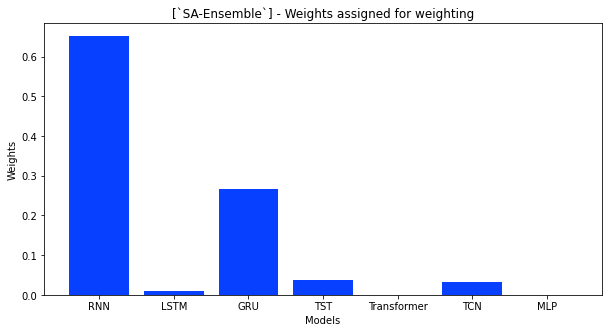

In [27]:
plt.figure(figsize=(10, 5))
plt.bar(validation_weights.keys(), validation_weights.values(), color='#0840FF')
plt.xlabel("Models")
plt.ylabel("Weights")
plt.title("[`SA-Ensemble`] - Weights assigned for weighting")
plt.savefig(f'methodology/imgs/results/forecasting/ensemble_weights.eps', dpi=600, bbox_inches='tight')
plt.savefig(f'methodology/imgs/results/forecasting/ensemble_weights.svg', dpi=600, bbox_inches='tight')
plt.savefig(f'methodology/imgs/results/forecasting/ensemble_weights.png', dpi=600, bbox_inches='tight')
plt.show()

In [28]:
sa_models_pred = []
for model in models:
    sa_models_pred.append(complete_prediction_df[complete_prediction_df['model'] == model].model_output)

In [29]:
weight_sum = []

for prediction, weight in zip(sa_models_pred, sa_weights):
    weight_sum.append(prediction * weight)

sa_weight_avg = np.sum(weight_sum, axis=0)/sum(sa_weights)
sa_weight_avg

array([-0.53373573, -0.53326227, -0.52815743, ..., -0.74236143,
       -0.74230246, -0.74797163])

In [31]:
calc_result_df = pd.concat([calc_result_df, pd.DataFrame([{ 
    'calculate_MSE': MSEError(labels, sa_weight_avg),
    'calculate_RMSE': RMSEError(labels, sa_weight_avg),
    'calculate_MAE': MAEError(labels, sa_weight_avg),
    'calculate_MAPE': MAPEError(labels, sa_weight_avg),
    'r2': r2_score(labels, sa_weight_avg),
    'model': 'SA-AvgRecorrentAvgEnsemble'
}])])

calc_result_df

,calculate_MSE,calculate_RMSE,calculate_MAE,calculate_MAPE,r2,model
0,0.002855,0.053434,0.026051,0.161302,0.927130,RNN
1,0.004104,0.064062,0.040248,0.207194,0.895259,LSTM
2,0.003213,0.056681,0.029107,0.165222,0.918004,GRU
3,0.007353,0.085752,0.050360,0.398466,0.812328,TST
4,0.037450,0.193519,0.168392,0.840950,0.044209,Transformer
5,0.013043,0.114206,0.099664,0.335913,0.667119,TCN
6,0.013339,0.115497,0.070083,0.447044,0.659550,MLP
0,0.004764,0.069021,0.042609,0.259843,0.878418,RecorrentAvgEnsemble
0,0.002791,0.052834,0.025525,0.157307,0.928758,SA-AvgRecorrentAvgEnsemble
0,0.002791,0.052834,0.025525,0.157307,0.928758,SA-AvgRecorrentAvgEnsemble


['RNN', 'LSTM', 'GRU', 'TST', 'Transformer', 'TCN', 'MLP', 'RecorrentAvgEnsemble', 'SA-AvgRecorrentAvgEnsemble', 'SA-AvgRecorrentAvgEnsemble']


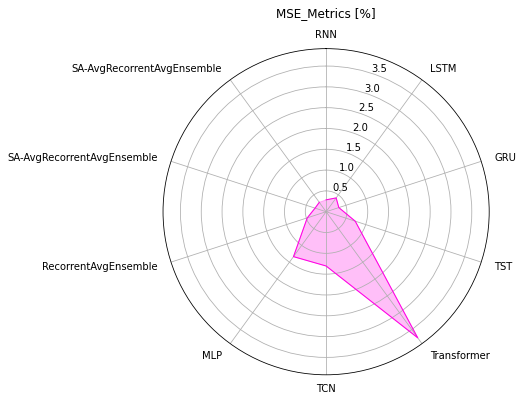

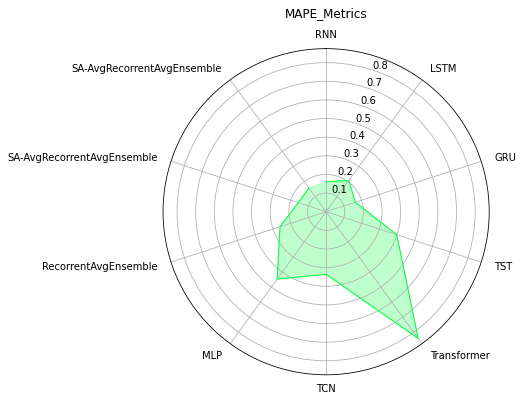

In [32]:
models_labels = calc_result_df['model'].tolist()
print(models_labels)
MSE_Values = (calc_result_df['calculate_MSE']* 100).tolist() 
PolarPlotMaker(models_labels, MSE_Values, '#FF00E4', 'MSE_Metrics [%]')

MAPE_Values = calc_result_df['calculate_MAPE'].tolist()
PolarPlotMaker(models_labels, MAPE_Values, '#00FF3E', 'MAPE_Metrics')

In [33]:
descaler = MinMaxScaler()
descaler.min_, descaler.scale_ = default_scaler.min_[-1], default_scaler.scale_[-1]
descaled_sa_avg_ensemble_prediction = descale(descaler, sa_weight_avg)
descaled_avg_ensemble_prediction = descale(descaler, ensemble_predictions)
descaled_mlp_prediction = descale(descaler, complete_prediction_df[complete_prediction_df['model'] == 'MLP'].model_output)
descaled_rnn_prediction = descale(descaler, complete_prediction_df[complete_prediction_df['model'] == 'RNN'].model_output)
descaled_gru_prediction = descale(descaler, complete_prediction_df[complete_prediction_df['model'] == 'GRU'].model_output)
descaled_lstm_prediction = descale(descaler, complete_prediction_df[complete_prediction_df['model'] == 'LSTM'].model_output)
descaled_transformers_prediction = descale(descaler, complete_prediction_df[complete_prediction_df['model'] == 'Transformer'].model_output)
descaled_tst_prediction = descale(descaler, complete_prediction_df[complete_prediction_df['model'] == 'TST'].model_output)
descaled_label = descale(descaler, labels)

# Results

In [34]:
calc_result_df

,calculate_MSE,calculate_RMSE,calculate_MAE,calculate_MAPE,r2,model
0,0.002855,0.053434,0.026051,0.161302,0.927130,RNN
1,0.004104,0.064062,0.040248,0.207194,0.895259,LSTM
2,0.003213,0.056681,0.029107,0.165222,0.918004,GRU
3,0.007353,0.085752,0.050360,0.398466,0.812328,TST
4,0.037450,0.193519,0.168392,0.840950,0.044209,Transformer
5,0.013043,0.114206,0.099664,0.335913,0.667119,TCN
6,0.013339,0.115497,0.070083,0.447044,0.659550,MLP
0,0.004764,0.069021,0.042609,0.259843,0.878418,RecorrentAvgEnsemble
0,0.002791,0.052834,0.025525,0.157307,0.928758,SA-AvgRecorrentAvgEnsemble
0,0.002791,0.052834,0.025525,0.157307,0.928758,SA-AvgRecorrentAvgEnsemble


# Previsões comparadas ao SA-Ensemble

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


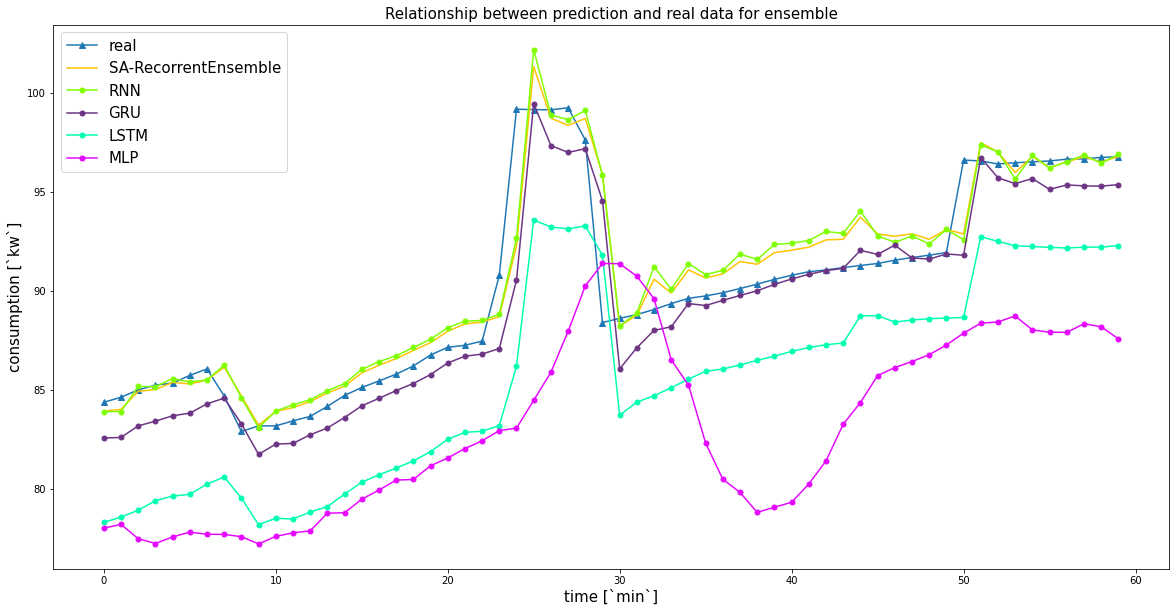

In [35]:
plt.figure(figsize=(20, 10))
plt.title(f'Relationship between prediction and real data for ensemble', fontsize=15)
plt.plot(descaled_label[:60], '^', ls='-',label='real')
plt.plot(descaled_sa_avg_ensemble_prediction[:60], ms = 10, ls = '-', c = '#FFC300',label='SA-RecorrentEnsemble')
plt.plot(descaled_rnn_prediction[:60], '.', ms = 10, ls = '-', c = '#7FFF00',label='RNN')
plt.plot(descaled_gru_prediction[:60], '.', ms = 10, ls = '-', c = '#6C3483',label='GRU')
plt.plot(descaled_lstm_prediction[:60], '.', ms = 10, ls = '-', c = '#00FFB2',label='LSTM')
plt.plot(descaled_mlp_prediction[:60], '.', ms = 10, ls = '-', c = '#E508FF',label='MLP')

# plt.plot(descaled_transformers_prediction[:60], ms = 10, ls = '-', c = '#E508FF',label='Transformer')
# plt.plot(descaled_tst_prediction[:60], ms = 10, ls = '-', c = '#FFCE08',label='TST')



# plt.plot(output, 'm--', label='predictions')

plt.xlabel('time [`min`]', fontsize=15)
plt.ylabel('consumption [`kw`]', fontsize=15)
plt.legend(fontsize=15)
plt.savefig(f'methodology/imgs/results/forecasting/ensemble_models_forecasting.eps', dpi=600, bbox_inches='tight')
plt.savefig(f'methodology/imgs/results/forecasting/ensemble_models_forecasting.svg', dpi=600, bbox_inches='tight')
plt.savefig(f'methodology/imgs/results/forecasting/ensemble_models_forecasting.png', dpi=600, bbox_inches='tight')
plt.show()

In [36]:
descaler = MinMaxScaler()
descaler.min_, descaler.scale_ = default_scaler.min_[-1], default_scaler.scale_[-1]

# Comparativos entre Ensembles

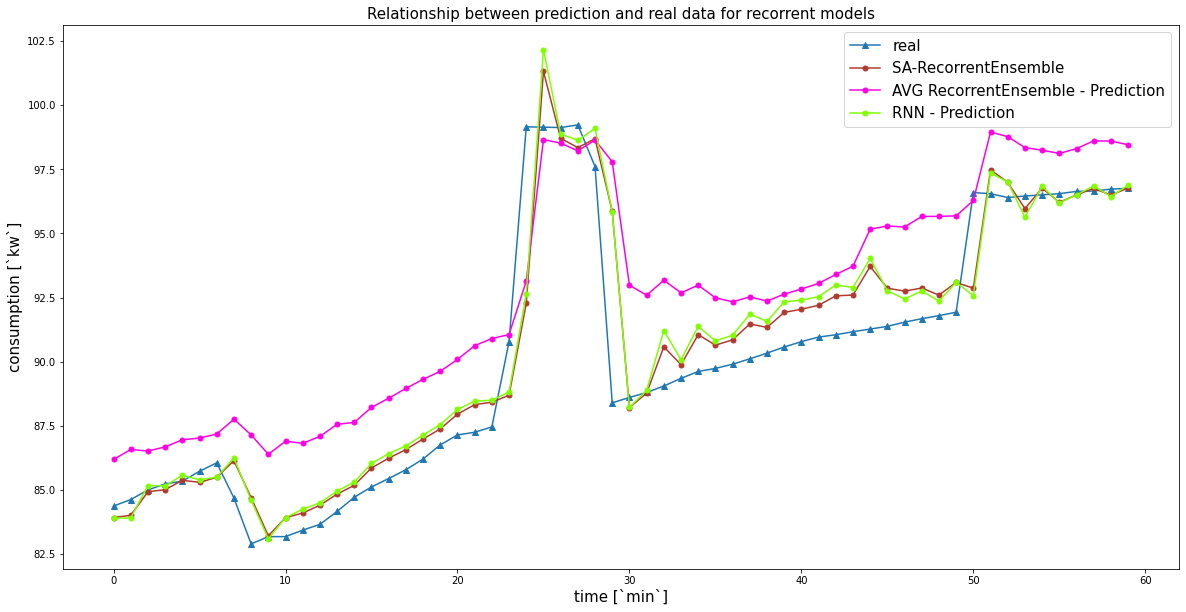

In [37]:
plt.figure(figsize=(20, 10))
plt.title(f'Relationship between prediction and real data for recorrent models', fontsize=15)
plt.plot(descaled_label[:60], '^', ls='-',label='real')
plt.plot(descaled_sa_avg_ensemble_prediction[:60], '.', ms = 10, ls = '-', c = '#B03A2E',label='SA-RecorrentEnsemble')
plt.plot(descaled_avg_ensemble_prediction[:60], '.', ms = 10, ls = '-', c = '#FF00E4',label='AVG RecorrentEnsemble - Prediction')
plt.plot(descaled_rnn_prediction[:60], '.', ms = 10, ls = '-', c = '#7FFF00',label='RNN - Prediction')

# plt.plot(output, 'm--', label='predictions')

plt.xlabel('time [`min`]', fontsize=15)
plt.ylabel('consumption [`kw`]', fontsize=15)
plt.legend(fontsize=15)
# plt.savefig(f'methodology/imgs/results/forecasting/others_models_forecasting.eps', dpi=600, bbox_inches='tight')
# plt.savefig(f'methodology/imgs/results/forecasting/others_models_forecasting.svg', dpi=600, bbox_inches='tight')
plt.show()